In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.optimize import curve_fit
import scipy.optimize
from operator import add

import seaborn as sns
sns.set_style("ticks", {"xtick.major.size": 12, "ytick.major.size": 12})
sns.set_context("paper")

import matplotlib
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':12})
matplotlib.rc('mathtext',**{'default':'regular'})

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
#calculating rho-----
def rho(top,bot):
	d = 0.00125 #meters
	cons = (np.pi*d/np.log(2)) * ((top + bot)/2)
	f = 1/ np.cosh(np.log(top/bot)/2.403)
	return cons * f


def hallcoef(V_BD_p, V_nBD_p, V_BD_n, V_nBD_n,  V_AC_p, V_nAC_p, V_AC_n, V_nAC_n,Bplus, Bminus, I_1,I_2,I_3,I_4,I_5,I_6,I_7,I_8):

	d = 0.00125 #meters

	I = ( abs(I_1) + abs(I_2) +  abs(I_3) +  abs(I_4)  + abs(I_5) + abs(I_6)+ abs(I_7)+ abs(I_8))/8

	B = (abs(Bplus) + abs(Bminus))/2
	V_HC = -(V_nBD_p - V_BD_p + V_BD_n  - V_nBD_n)
	V_HD = -(V_nAC_p -  V_AC_p +  V_AC_n -V_nAC_n)

	R_HC =  10000 * -d*(V_nBD_p - V_BD_p + V_BD_n  - V_nBD_n  ) / (4*B*I ) #m^3/C
	R_HD = 10000 * -d*(V_nAC_p -  V_AC_p +  V_AC_n -V_nAC_n ) / (4*B*I)

	errorig = 100;
	errorB = B * (np.sqrt(2*errorig**2)/(abs(Bplus) + abs(Bminus)));
	errorR_HC = R_HC*(errorB/B)
	errorR_HD= R_HD *(errorB/B)
	sumerror = np.sqrt(errorR_HC**2+errorR_HD**2)
	div2error = ((R_HC + R_HD)/2) * (sumerror/(R_HC + R_HD))

	return [(R_HC + R_HD)/2, (V_HC+V_HD)/8,div2error]



def firsthalf(x,m,b):
	return m*(x**(3./2.))+b

def firsthalferror(x,m,b,merror,berror):
	mult = m*(x**(3./2.))
	multe = mult*(merror/m)
	add = mult + b
	error = np.sqrt(multe**2+berror**2)
	return error

def secondhalf(x,m,b):
	return m*(x**(-3./2.))+b

In [5]:
data = open('Trial_3.dat');
trial_str = "Trial " + str(3)

In [6]:
TemperatureK = []; #0
B_Field_Gauss = [] #1
current_AB = [] #2
current_AD = [] #3
current_AC = []	#4
current_BD	 = [] #5
current_neg_AB	 = [] #6
current_neg_AD	 = [] #7
current_neg_AC	 = [] #8
current_neg_BD	 = [] #9
Voltage_CD	 = [] #10
Voltage_BC	 = [] #11
Voltage_BD	 = [] #12
Voltage_AC	 = [] #13
Voltage_neg_CD	 = [] #14
Voltage_neg_BC	 = [] #15
Voltage_neg_BD	 = [] #16
Voltage_neg_AC	 = [] #17

R_AB_CD = [] #0
R_AD_BC = [] #1
R_AC_BD = [] #2
R_BD_AC = [] #3
R_AB_CD_neg = [] #4
R_AD_BC_neg = [] #5
R_AC_BD_neg = [] #6
R_BD_AC_neg = [] #7


Res = [R_AB_CD,R_AD_BC,R_AC_BD,R_BD_AC,R_AB_CD_neg,R_AD_BC_neg,R_AC_BD_neg,R_BD_AC_neg]

values = [TemperatureK,B_Field_Gauss,current_AB,current_AD,current_AC,current_BD,current_neg_AB,current_neg_AD,current_neg_AC,current_neg_BD,Voltage_CD,Voltage_BC,Voltage_BD,Voltage_AC,Voltage_neg_CD,Voltage_neg_BC,Voltage_neg_BD,Voltage_neg_AC]

for columns in ( raw.strip().split() for raw in data ):
	if len(columns) == len(values):
		for a in range(len(values)):
			if(a >=2  and a <=9 ):
				Res[a-2] += [float(columns[a+8])/float(columns[a])]
			values[a]+= [float(columns[a])]

In [7]:
#---------------------------------------------
e = 1.602*10**-19 #colombs
b = 0

#calculate Hall Coefficient
THCOEFF0 = 0
HcoeE = 0;


TempHC = None;
HallCO = None;

Naa  = 0;

293.35 [-0.12084452454999528, -0.0005129125, 0.0017110596856397245] hallcoef,potential,hallcoef error
298.15 [-0.09900692677410236, -0.000420225, 0.0014015275434986066] hallcoef,potential,hallcoef error
2.9930749226617914 avg hall coef at n type
2.751672299676102 hall coef at min T
5.814645879846722e+18 hello
4226263338502307.5
5.470744475862121e+18 Hole Concentration in intrinsic
[270.79557956] Hall voltage Zero, Inv. temperature


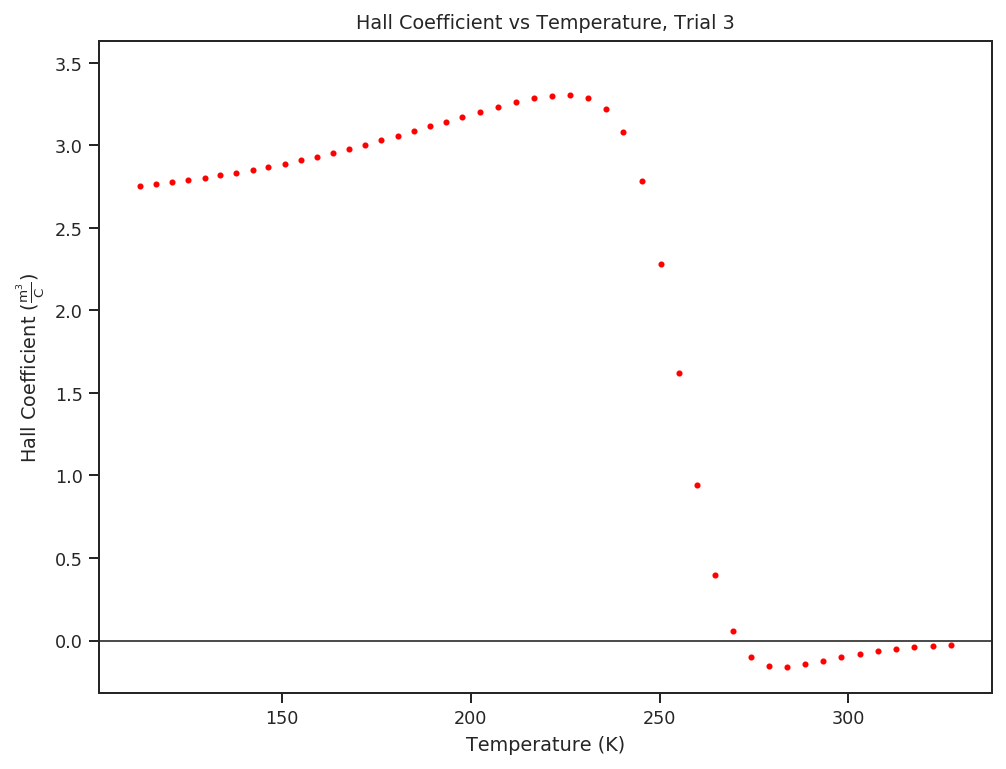

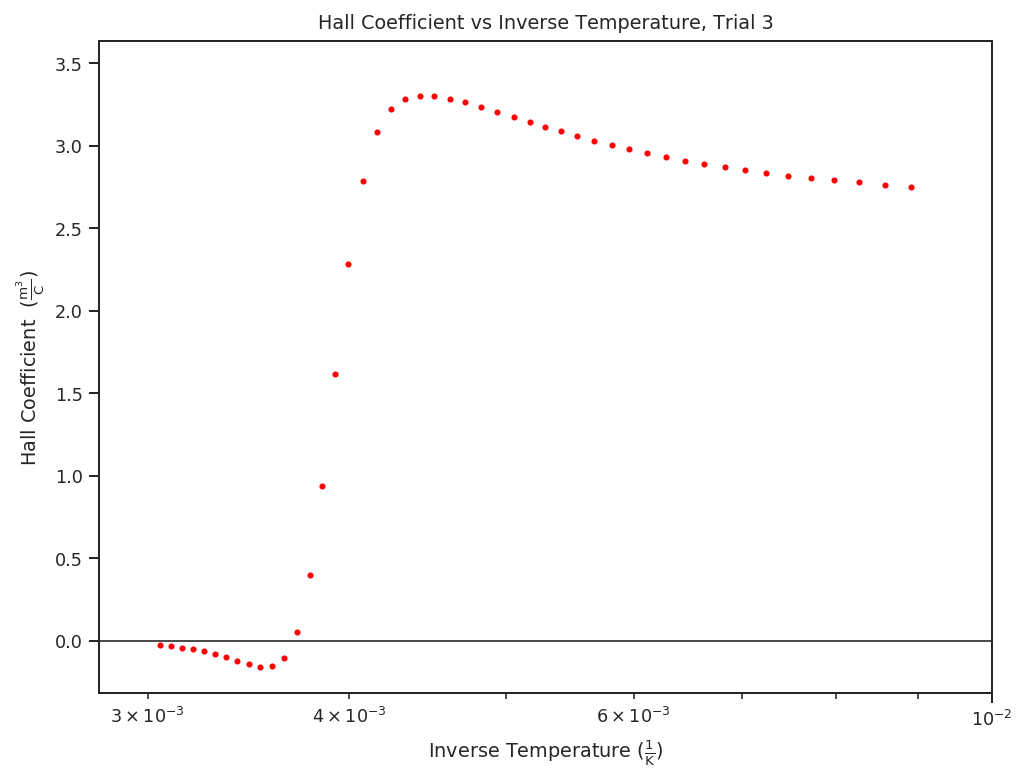

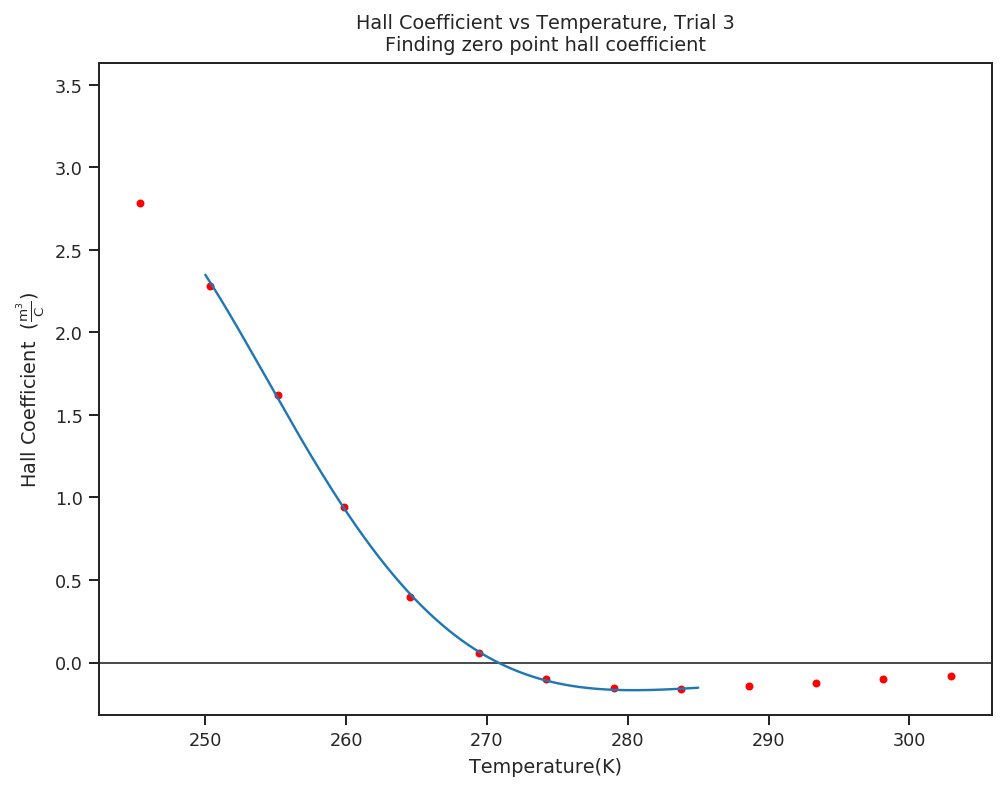

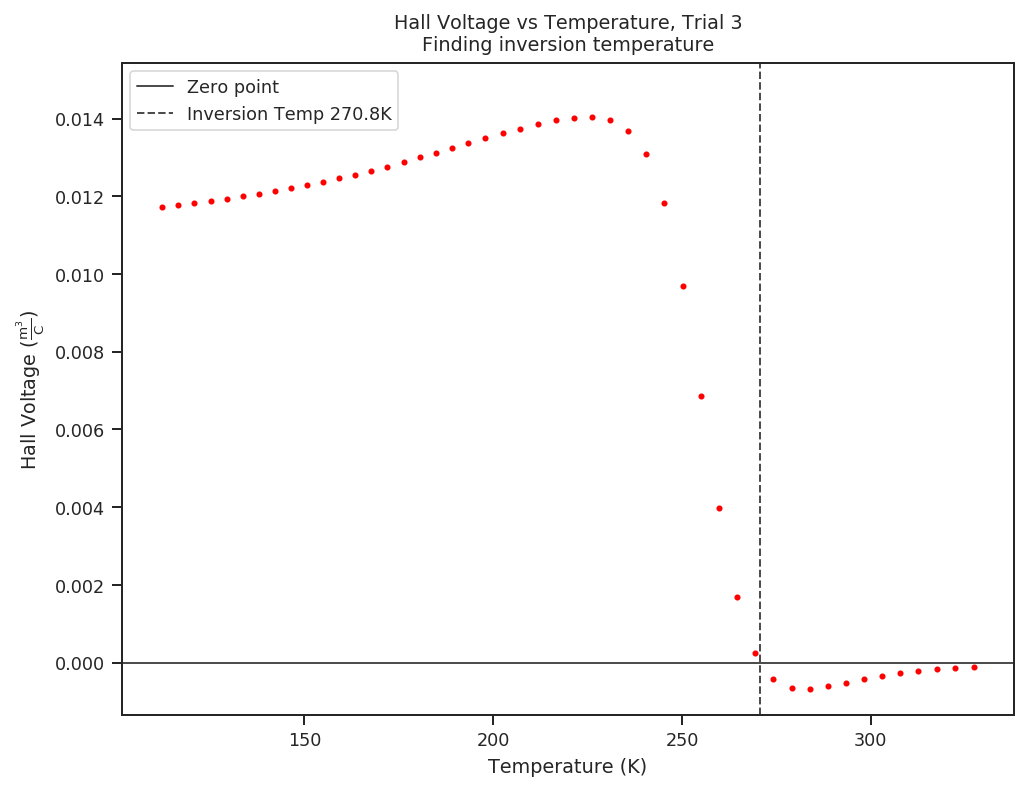

In [8]:
if(True):
	HALCOE = []
	HalVolt = []
	TEMP = []
	for a in range(0,len(values[0]),3):
		ans = hallcoef(values[12][a],values[16][a],values[12][a+2],values[16][a+2],    values[13][a],values[17][a],values[13][a+2],values[17][a+2],   values[1][a],values[1][a+2],  values[9][a],values[9][a+2],values[8][a],values[8][a+2],values[5][a],values[5][a+2],values[4][a],values[4][a+2])
		HALCOE += [ans[0]]
		HalVolt+=[ans[1]]
		TEMP += [ (values[0][a] + values[0][a+2])/2 ]
		if(290<TEMP[-1]<300):
			# print(len(ans))
			print(TEMP[-1], ans, "hallcoef,potential,hallcoef error")
	HcoeE = np.average(HALCOE[0:np.argmax(HALCOE)])

	TempHC = np.copy(TEMP)
	HallCO = np.copy(HALCOE)

	plt.figure(figsize=(8,6))

	print(HcoeE, "avg hall coef at n type")
	plt.scatter(TEMP, HALCOE, s = 5, c = 'red')
	plt.axhline(0, linewidth=1, ls='-', color="0.3", label="Zero point")
	plt.ylim([min(HALCOE)*2,max(HALCOE)*1.1])
	plt.title('Hall Coefficient vs Temperature, ' + trial_str)
	plt.xlabel('Temperature (K)')
	plt.ylabel(r'Hall Coefficient $(\frac{m^3}{C})$')


#	plt.figure(figsize=(8,6))


	pdensity = np.divide((1.6e19),HALCOE[0:np.argmax(HALCOE)-5])
	print(HALCOE[0], "hall coef at min T")
	print(pdensity[0],"hello")
	print(pdensity[0]*.002/HALCOE[0])



	Naa = np.average(pdensity)
	print(Naa, "Hole Concentration in intrinsic")
	# sys.exit()
	# # print(1./(HALCOE[0]*1.6e-19))
	# print(pmobility[0])
	# sys.exit()
# 	plt.xlabel('Temperature (K)')
# 	plt.ylabel('Density(1/m^3)')
# 	plt.scatter(TEMP[0:np.argmax(HALCOE)-5],pdensity)




	plt.figure(figsize=(8,6))

	plt.scatter(np.divide(1,TEMP), HALCOE, s = 5, c = 'red')
	plt.axhline(0, linewidth=1, ls='-', color="0.3", label="Zero point")
	plt.ylim([min(HALCOE)*2,max(HALCOE)*1.1])
	plt.xscale('log')
	plt.xlim(2.8*1e-3,1e-2)
	plt.xlabel(r'Inverse Temperature $(\frac{1}{K})$')
	plt.ylabel(r'Hall Coefficient  $(\frac{m^3}{C})$')
	plt.title('Hall Coefficient vs Inverse Temperature, ' + trial_str)



	plt.figure(figsize=(8,6))

	idx0, idx1 = 30, -5

	plt.scatter(TEMP[idx0:idx1], HALCOE[idx0:idx1], s = 10, c = 'red')
	plt.ylim([min(HALCOE)*2,max(HALCOE)*1.1])


	degree = 6
	A = np.polyfit(x = TEMP[idx0:idx1], y = HALCOE[idx0:idx1],deg = degree)

	inp = np.array(list(np.linspace(250,285,10000)));
	out = np.array([   sum([ A[a]*i**(degree - a) for a in range(degree+1)  ])  for i in inp  ])
	check = [abs(a - 0) for a in out]
	THCOEFF0 = inp[np.where(check == min(check))];
	THCOEFF0_label = "Inversion Temp "+ str(np.round(THCOEFF0[0],1)) +'K'
    
	plt.axhline(0, linewidth=1, ls='-', color="0.3", label="Zero point")
	plt.plot(inp,out)
	plt.xlabel('Temperature(K)')
	plt.ylabel(r'Hall Coefficient  $(\frac{m^3}{C})$')
	plt.title('Hall Coefficient vs Temperature, ' + trial_str + "\nFinding zero point hall coefficient")

	#-------------


	plt.figure(figsize=(8,6))
	plt.scatter(TEMP, HalVolt, s = 5, c = 'red')
	plt.axhline(0, linewidth=1, ls='-', color="0.3", label="Zero point")
	plt.ylim([min(HalVolt)*2,max(HalVolt)*1.1])
	plt.title('Hall Voltage vs Temperature, ' + trial_str + "\nFinding inversion temperature")
	plt.xlabel('Temperature (K)')
	plt.ylabel(r'Hall Voltage $(\frac{m^3}{C})$')
	print(THCOEFF0 , "Hall voltage Zero, Inv. temperature")
	plt.axvline(THCOEFF0, linewidth=1, ls='--', color="0.3", label=THCOEFF0_label)
	plt.legend()
	plt.show()

290.1 1.1951345633671688 resisitivity(Ohm Meter)
291.85 1.07291606352559 resisitivity(Ohm Meter)
293.4 0.9394827991684565 resisitivity(Ohm Meter)
294.85 0.9030324042664953 resisitivity(Ohm Meter)
296.65 0.8163063521239204 resisitivity(Ohm Meter)
298.2 0.7171299655033809 resisitivity(Ohm Meter)
299.65 0.6870458502548362 resisitivity(Ohm Meter)
[1.47491089] [1.00301239] b, and b error
[283.8   288.6   293.35  298.15  302.975 307.775 312.6   317.5   322.375]
[3.92982398e+19 4.39356295e+19 5.16547794e+19 6.30480862e+19
 7.77788177e+19 9.71383489e+19 1.20487109e+20 1.50664548e+20
 1.85798774e+20]
p drift:  0.11893136587179022
n drift:  [0.17541317]
243.6833333333333 switch from extrinsic to intrinsic


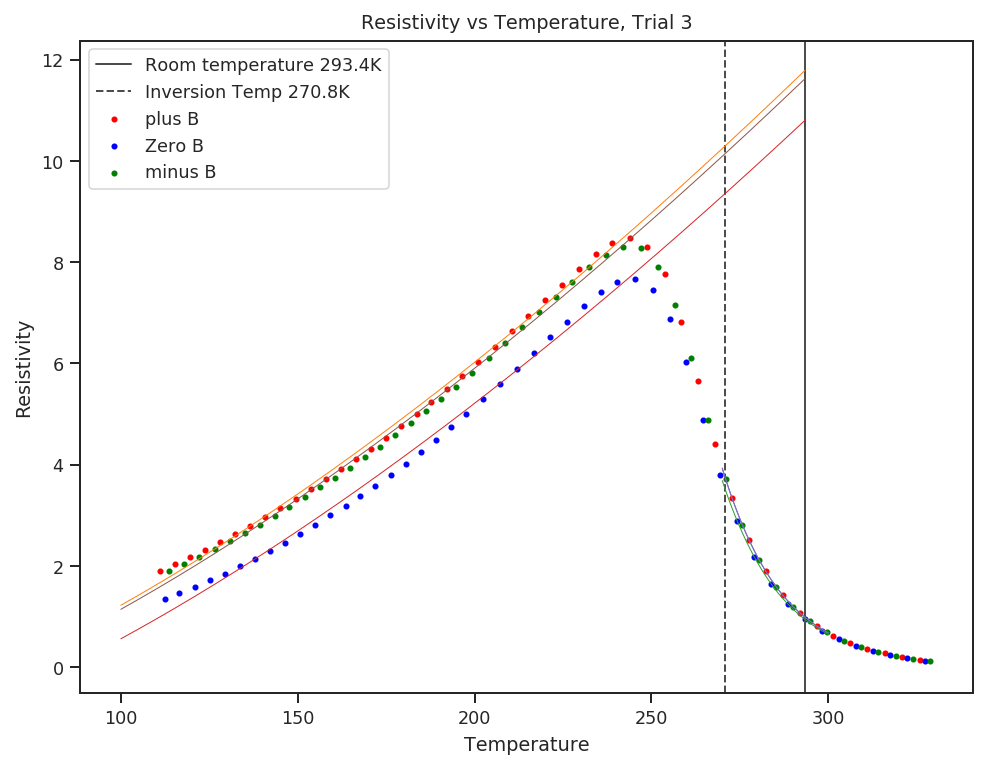

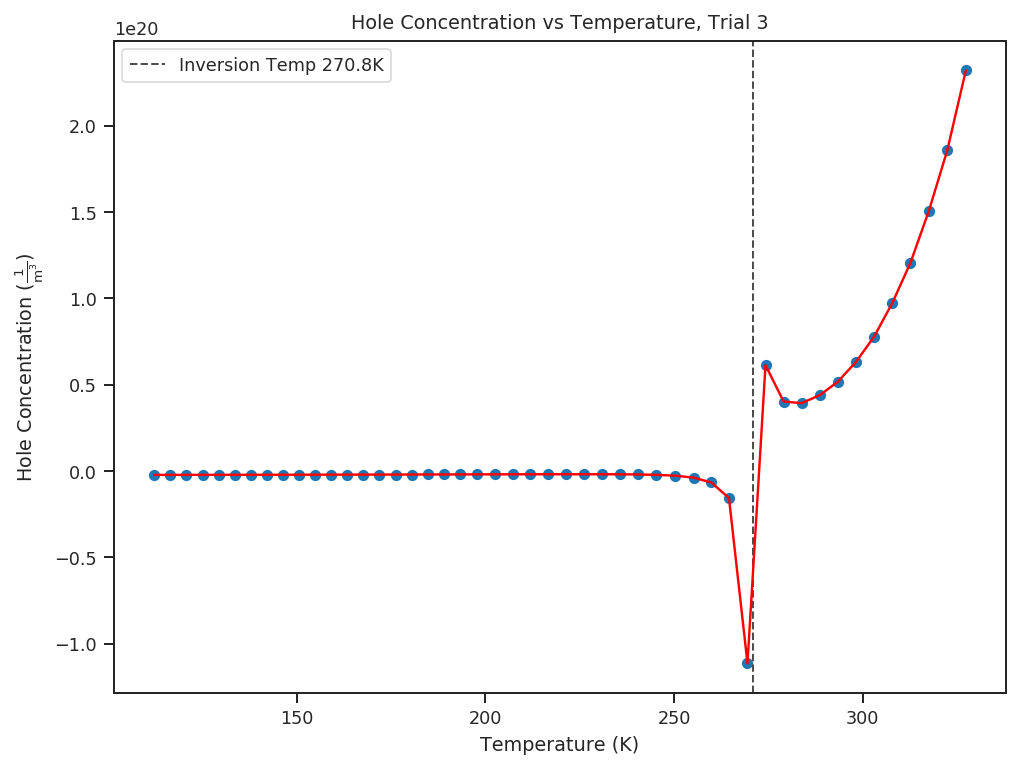

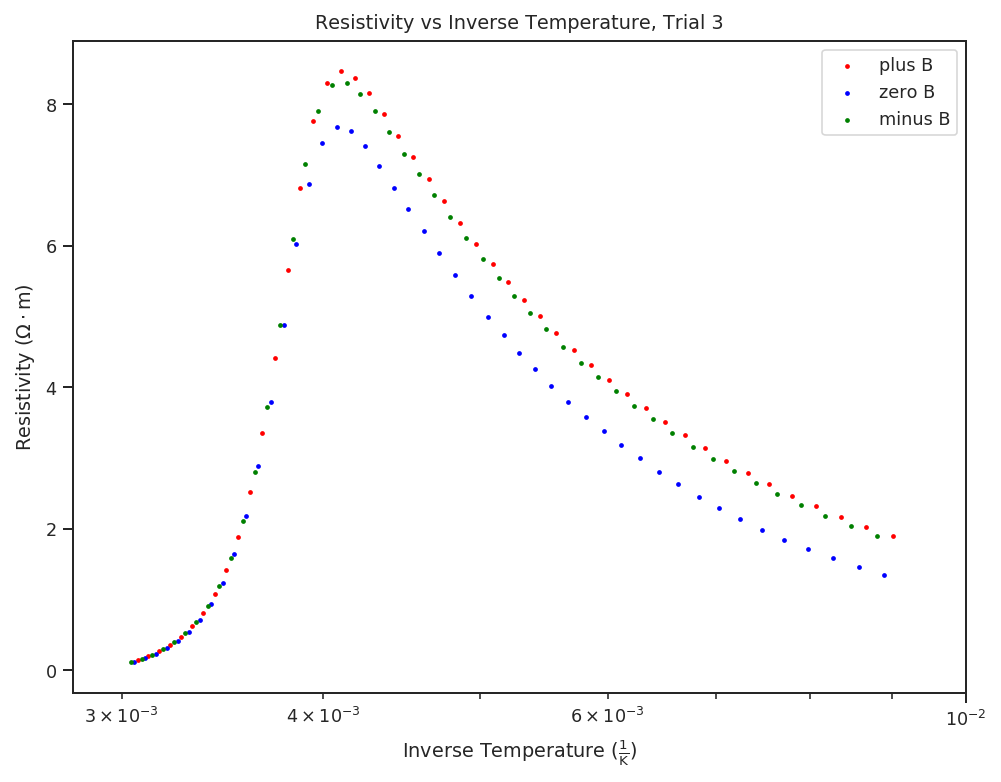

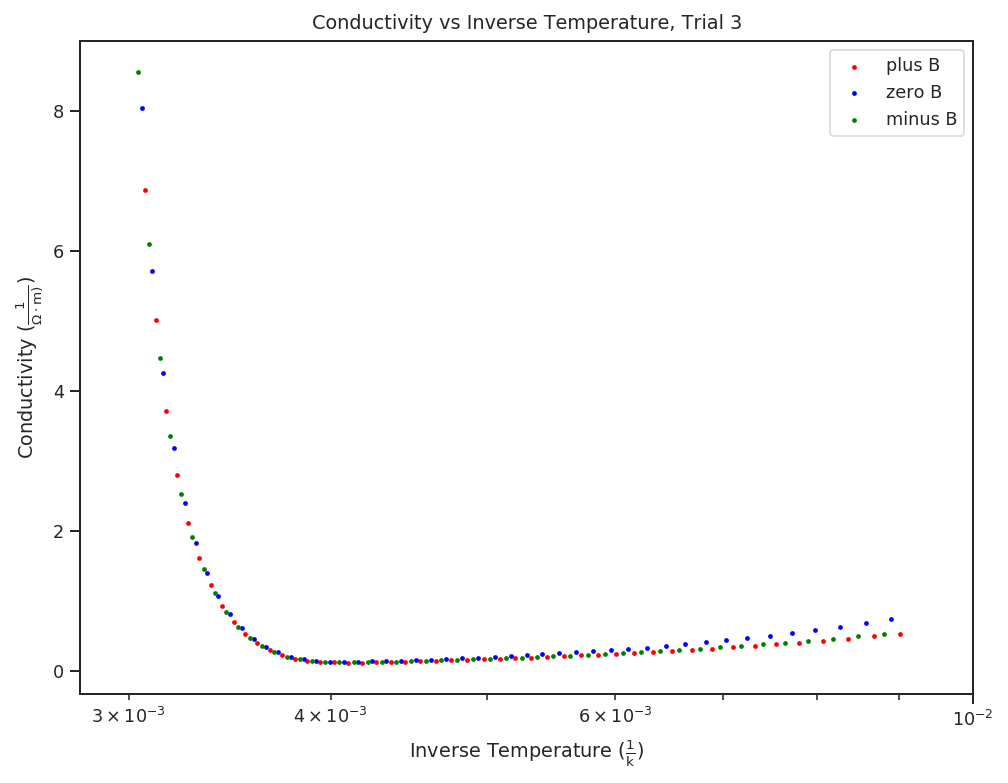

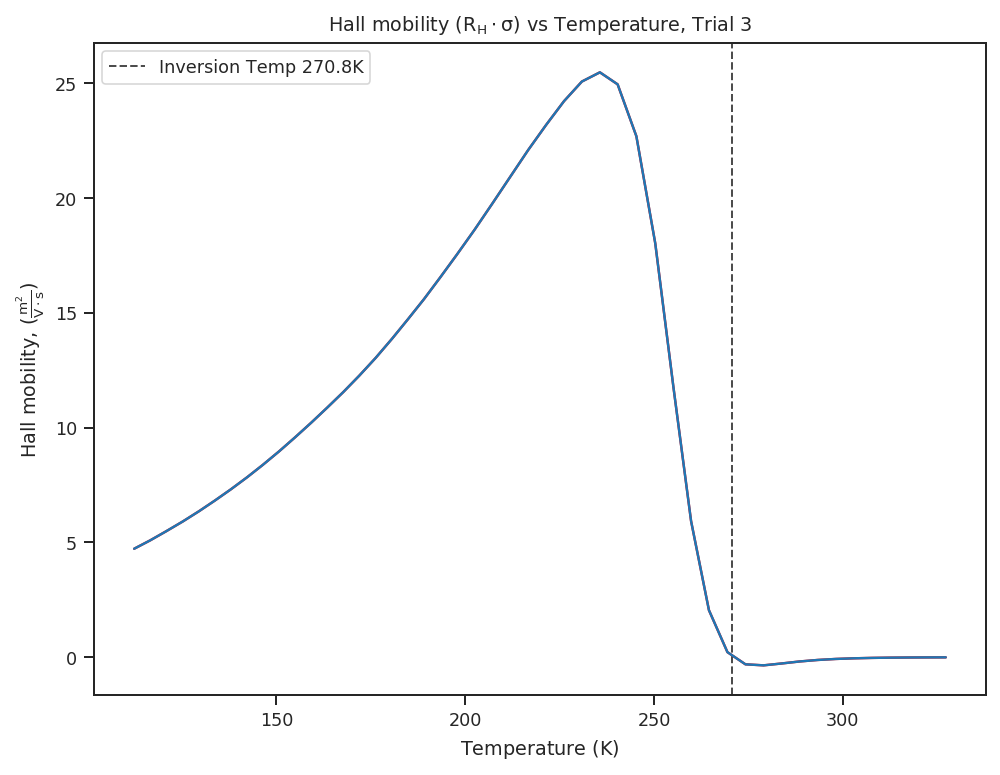

In [9]:
#calculate resisitivity
if(True):
	rh_0 = []; #POSITIVE B
	rh_1 = []; #ZERO B
	rh_2 = []; #NEGATIVE B
	T = values[0];
	# print(T)
	T_0 = [];
	T_1 = [];
	T_2 = [];
	for a in range(len(Res[0])):
		to = Res[0][a]
		bo = Res[1][a]
		# if(to*bo < 0):
		# 	print(to,bo, a)
		if(a%3 == 0):
			rh_0+=[rho(to,bo)]
			T_0 += [T[a]]
		elif(a%3 == 1):
			rh_1+=[rho(to,bo)]
			T_1 += [T[a]]
		else:
			rh_2+=[rho(to,bo)]
			T_2 += [T[a]]
		if(290<T[a]< 300):
			print(T[a], rho(to,bo), "resisitivity(Ohm Meter)")


            
# Change room temperature and polyfit indices.
	THCOEFF_rt = 293.4
	rt_label="Room temperature "+str(THCOEFF_rt)+'K'
    
	idx2, idx3 = 35, -2
	idx4, idx5 = 0, 30


    
	# print(rh_0[40:46])
	# print(T_0[40:46])

	#95-220
	plt.figure(figsize=(8,6))

	ax = plt.gca()

	plt.axvline(THCOEFF_rt, linewidth=1, ls='-', color="0.3", label=rt_label)
	plt.axvline(THCOEFF0, linewidth=1, ls='--', color="0.3", label=THCOEFF0_label)

	degree = 4

	plt.scatter( T_0, rh_0, s = 5, c = 'red', label='plus B')

	A0 = np.polyfit(x = T_0[idx2:idx3], y = rh_0[idx2:idx3],deg = degree)
	inp0 = np.array(list(np.linspace(270,300,1000)));
	out0 = np.array([   sum([ A0[a]*i**(degree - a) for a in range(degree+1)  ])  for i in inp0  ])
	plt.plot(inp0,out0,linewidth=.5)
	val0 = sum([ A0[a]*THCOEFF0**(degree - a) for a in range(degree+1)  ])
#	print(val0)

	inp0_0 = np.array(list(np.linspace(100,THCOEFF_rt,1000)));
	coeff0,cov0=curve_fit(firsthalf,T_0[idx4:idx5],rh_0[idx4:idx5])
	out0_0 = np.array([  firsthalf(i,coeff0[0],coeff0[1])   for i in inp0_0  ])
	plt.plot(inp0_0,out0_0,linewidth=.5)


	#-------------

	plt.scatter( T_1, rh_1, s = 5, c = 'blue', label='Zero B')
	A1 = np.polyfit(x = T_1[idx2:idx3], y = rh_1[idx2:idx3],deg = degree)
	inp1 =np.array(list(np.linspace(270,300,1000)));
	out1 = np.array([   sum([ A1[a]*i**(degree - a) for a in range(degree+1)  ])  for i in inp1  ])
	plt.plot(inp1,out1,linewidth=.5)
	val1 = sum([ A1[a]*THCOEFF0**(degree - a) for a in range(degree+1)  ])
#	print(val1)


	inp1_1 = np.array(list(np.linspace(100,THCOEFF_rt,1000)));
	coeff1,cov1=curve_fit(firsthalf,T_1[idx4:idx5],rh_1[idx4:idx5])
	out1_1 = np.array([  firsthalf(i,coeff1[0],coeff1[1])   for i in inp1_1  ])
	plt.plot(inp1_1,out1_1,linewidth=.5)

	#-------------


	plt.scatter(T_2, rh_2, s = 5, c = 'green', label='minus B')
	A2 = np.polyfit(x = T_2[idx2:idx3], y = rh_2[idx2:idx3],deg = degree)
	inp2 = np.array(list(np.linspace(270,300,1000)));
	out2 = np.array([   sum([ A2[a]*i**(degree - a) for a in range(degree+1)  ])  for i in inp2  ])
	plt.plot(inp2,out2,linewidth=.5)
	val2 = sum([ A2[a]*THCOEFF0**(degree - a) for a in range(degree+1)  ])
#	print(val2)



	inp2_2 = np.array(list(np.linspace(100,THCOEFF_rt,1000)));
	coeff2,cov2=curve_fit(firsthalf,T_2[idx4:idx5],rh_2[idx4:idx5])
	out2_2 = np.array([  firsthalf(i,coeff2[0],coeff2[1])   for i in inp2_2  ])
	plt.plot(inp2_2,out2_2,linewidth=.5)



	ie0 = np.sqrt(np.diag(cov0))
	ie1 = np.sqrt(np.diag(cov1))
	ie2 = np.sqrt(np.diag(cov2))

	error1 = firsthalferror(THCOEFF0,coeff0[0],coeff0[1],*ie0)
	error2 = firsthalferror(THCOEFF0,coeff1[0],coeff1[1],*ie1)
	error3 = firsthalferror(THCOEFF0,coeff2[0],coeff2[1],*ie2)

	errortoradd = np.sqrt(error1**2 + error2 **2 + error3**3)

	imp1 = sum([firsthalf(THCOEFF_rt,coeff2[0],coeff2[1]),firsthalf(THCOEFF_rt,coeff1[0],coeff1[1]),firsthalf(THCOEFF_rt,coeff0[0],coeff0[1]) ])/3
	imp1error = imp1*(errortoradd/sum([firsthalf(THCOEFF0,coeff2[0],coeff2[1]),firsthalf(THCOEFF0,coeff1[0],coeff1[1]),firsthalf(THCOEFF0,coeff0[0],coeff0[1]) ]))
	imp2 = sum([val0,val1,val2])/3
	b = imp1/(imp1-imp2)
	berror = b**(imp1error/imp1)
# 	b = b[0]
	print(b, berror, "b, and b error")
#	print(Naa, "Hole Concentration extrinsic")
	#-------------


	plt.title('Resistivity vs Temperature, ' + trial_str)
	plt.xlabel('Temperature')
	plt.ylabel('Resistivity')
	ax.legend()

	size = -15
	n = [];
	for R in  HallCO[size:]:
		wuga = -1*(np.sqrt( b*b + 4*b*e*Naa*R+1) - b - 2*e*Naa*R + 1)
		wugb = 2*b*e*R+2*e*R
		n+= [wuga/wugb]

# Hole concentration
	plt.figure(figsize=(8,6))
	p_concen = 1/(-e*np.copy(HALCOE))
	print(TempHC[-10:-1])
	print(p_concen[-10:-1])   
	plt.scatter(TempHC, p_concen)
	plt.axvline(THCOEFF0, linewidth=1, ls='--', color="0.3", label=THCOEFF0_label)
	plt.plot(TempHC, p_concen, color='r')
	plt.xlabel('Temperature (K)')
	plt.ylabel(r'Hole Concentration $(\frac{1}{m^3})$')
	plt.title('Hole Concentration vs Temperature, ' + trial_str)
	plt.legend()
    
# Drift Mobilities
	p_rt = 6.78258928e+19
	pho_rt = 0.77383
	p_drift = 1/(pho_rt*e*p_rt)
	n_drift = b*p_drift
    
	print("p drift: ", p_drift)
	print("n drift: ", n_drift)
    
# Electron concentration

# 	plt.figure(figsize=(8,6))
# 	plt.scatter([100,150,200,230]+list(TempHC[size:]),[0,0,0,0]+n)
# 	plt.plot([100,150,200,230]+list(TempHC[size:]),[0,0,0,0]+n, color='r')
# 	plt.xlabel('Temperature (K)')
# 	plt.ylabel(r'Electron Concentration $(\frac{1}{m^3})$')
# 	plt.title('Electron Concentration vs Temperature, ' + trial_str)
# 	#-------------
# 	print('T values for n', TempHC[size:][7])    
# 	print('n vals', n[7])   


	plt.figure(figsize=(8,6))
	ax = plt.gca()
	plt.scatter( np.divide(1,T_0),rh_0, s = 2.5, c = 'red',label = 'plus B')
	plt.scatter( np.divide(1,T_1),rh_1, s = 2.5, c = 'blue',label = 'zero B')
	plt.scatter( np.divide(1,T_2),rh_2, s = 2.5, c = 'green', label = 'minus B')
#	plt.axvline(1/T_swap, linewidth=1, ls='--', color="0.3", label=THCOEFF0_label)
	T_S = [T_0[np.argmax(rh_0)],
	T_1[np.argmax(rh_1)],
	T_2[np.argmax(rh_2)]]
	print(np.average(T_S), "switch from extrinsic to intrinsic")
	T_swap = np.average(T_S)

	plt.xscale('log')
	plt.xlim(2.8*1e-3,1e-2)
	plt.title('Resistivity vs Inverse Temperature, ' + trial_str)
	plt.xlabel(r'Inverse Temperature $(\frac{1}{K})$')
	plt.ylabel(r'Resistivity $(\Omega \cdot m)$')
	ax.legend()

	plt.figure(figsize=(8,6))
	ax = plt.gca()


	plt.scatter( np.divide(1,T_0), np.divide(1,rh_0),s = 2.5, c = 'red',label = 'plus B')
	plt.scatter(np.divide(1,T_1), np.divide(1,rh_1),  s = 2.5, c = 'blue',label = 'zero B')
	plt.scatter( np.divide(1,T_2), np.divide(1,rh_2),s = 2.5, c = 'green',label = 'minus B')
	plt.xscale('log')
	plt.xlim(2.8*1e-3,1e-2)
	plt.title('Conductivity vs Inverse Temperature, ' + trial_str)
	plt.xlabel(r'Inverse Temperature $(\frac{1}{k})$')
	plt.ylabel(r'Conductivity $(\frac{1}{\Omega\cdot m)})$')
	ax.legend()


	#-------------
    
	p_1 = list( map(add, rh_0, rh_1) )
	pt_1 = list( map(add, T_0, T_1) )
	suma = np.divide(list( map(add, p_1, rh_2) ),3)
	psuma = np.divide(list( map(add, pt_1, T_2) ),3)

#	print(psuma, suma)
# 	plt.figure(figsize=(8,6))
# 	ax = plt.gca()
# 	plt.xlabel('Temperature(K)')
# 	plt.ylabel('Mobility(m^3/(V*s))')
# 	yans = [ 1/(suma[i]*e*Naa) for i in range(5) ]
# 	plt.scatter(psuma[0:5],yans, label='hole mobility')
# 	plt.scatter(psuma[0:5], np.multiply(yans, b), label='electron mobility')
# 	ax.legend( )
# 	print(psuma[0:5],yans)

	# TempHC
	# HallCO
# 	print(len(suma))
# 	print(T_0[1])
# 	print(T_1[1])
# 	print(TempHC[1])
# 	print(len(TempHC))


# 	plt.figure(figsize=(8,6))

# 	plt.plot(1/psuma, np.divide(HallCO,suma))
# 	plt.title(r'Hall mobility $(R_H\cdot \sigma)$ vs Inverse Temperature, ' + trial_str)
# 	plt.xlabel(r'Inverse Temperature $(\frac{1}{k})$')
# 	plt.ylabel(r'Hall mobility, $(\frac{m^2}{V\cdot s})$')
# 	plt.xscale('log')
# 	plt.xlim(2.8*1e-3,1e-2)

	conductivity = (np.array(rh_0)+np.array(rh_1)+np.array(rh_2))/3
	hall_mob = conductivity*HALCOE
	plt.figure(figsize=(8,6))
	plt.axvline(THCOEFF0, linewidth=1, ls='--', color="0.3", label=THCOEFF0_label)
	plt.plot(psuma, hall_mob, 'r')
	plt.plot(psuma, hall_mob)
#	plt.plot(psuma, np.divide(HallCO,suma))
	plt.title(r'Hall mobility $(R_H\cdot \sigma)$ vs Temperature, ' + trial_str)
	plt.xlabel(r'Temperature $(K)$')
	plt.ylabel(r'Hall mobility, $(\frac{m^2}{V\cdot s})$')
	plt.legend()
#	plt.xscale('log')
#	plt.xlim(2.8*1e-3,1e-2)


# 	plt.figure(figsize=(8,6))


# 	plt.plot(TempHC, np.divide(1,np.multiply(HallCO,e)))
# 	plt.title('Hall concentration(1/(Hall Coefficientt * e) vs Temperature')
# 	plt.xlabel('Temperature(K)')
# 	plt.ylabel('Hall Concentration(1/m^3)')



	# plt.scatter(T_1[0:10],np.divide(1.6*10**19 , np.multiply(suma[0:10] , Naa)))



# 	print(np.average([val0,val1,val2]))
